In [1]:
from src.helpers.experiment import create_tsfresh_dataframe
from src.helpers.diabetes.cega import clarke_error_grid
from src.helpers.diabetes.madex import mean_adjusted_exponent_error
from pycaret.regression import setup, create_model, compare_models, predict_model
from loguru import logger
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas

In [2]:
train_parameters = {
    'ohio_no': 559,
    'scope': 'train',
    'train_ds_size': 2000,
    'window_size': 6,
    'prediction_horizon': 1,
    'minimal_features': False,
}

unseen_data_parameters = {
    'ohio_no': 559,
    'scope': 'test',
    'train_ds_size': 0,
    'window_size': 6,
    'prediction_horizon': 1,
    'minimal_features': False,
}

# output = run_experiment(parameters, test_parameters)

2021-06-18 15:42:45.133 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_train_2000_6_1.pkl
2021-06-18 15:42:45.261 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'train', 'train_ds_size': 2000, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


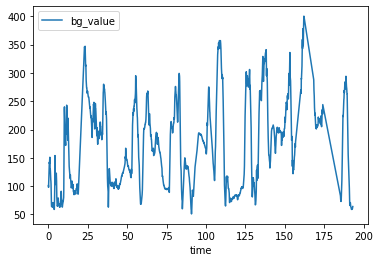

2021-06-18 15:42:45.664 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-18 15:42:45.665 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_train_2000_6_1.pkl


In [3]:
source_df = create_tsfresh_dataframe(train_parameters)
clean_df = source_df.drop(
    columns=['start', 'end', 'start_time', 'end_time'])

In [4]:
regressor = setup(clean_df,
    target='label',
    feature_selection=True,
    html=True,
    silent=True,
    session_id=1974
    )

,Description,Value
0,session_id,1974
1,Target,label
2,Original Data,"(1994, 788)"
3,Missing Values,True
4,Numeric Features,259
5,Categorical Features,528
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1395, 225)"


In [5]:
best3 = compare_models(
    exclude=['catboost', 'xgboost'],
    sort='RMSE',
    n_select=3,
    verbose=True
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,5.0837,78.7150,8.6576,0.9856,0.0502,0.0318,0.9770
et,Extra Trees Regressor,4.7262,81.5302,8.7631,0.9852,0.0501,0.0295,1.3850
lightgbm,Light Gradient Boosting Machine,5.2272,92.8729,9.2643,0.9832,0.0523,0.0323,0.5750
rf,Random Forest Regressor,5.2466,97.0964,9.4654,0.9824,0.0530,0.0321,2.1160
knn,K Neighbors Regressor,7.2022,168.0453,12.8229,0.9686,0.0774,0.0456,0.0640
dt,Decision Tree Regressor,7.9536,182.9476,13.2658,0.9660,0.0802,0.0493,0.0670
ada,AdaBoost Regressor,10.4262,202.9590,14.1320,0.9625,0.1039,0.0765,0.5370
lasso,Lasso Regression,6.3282,1071.2095,19.4149,0.7887,0.0691,0.0393,0.0570
en,Elastic Net,7.3801,2703.4687,30.1724,0.4899,0.0721,0.0422,0.0630
lr,Linear Regression,25.7282,1039.7401,32.0389,0.8074,0.2297,0.1977,0.5930


In [6]:
best3

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1974, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, m

In [7]:
master_output = {}

In [8]:
def run_model(model_to_run):
    output = {}
    model = create_model(model_to_run)
    model_name = model.__str__().split('(')[0]
    logger.info(f'Processing model: {model_name}')
    output['model'] = model
    output['model_name'] = model_name
    pd = predict_model(model)
    (_, res) = clarke_error_grid(pd['label'], pd['Label'], 'Test')
    output['internal_cga_analysis'] = res
    rmse = np.sqrt(mean_squared_error(pd['label'], pd['Label']))
    rmadex = np.sqrt(mean_adjusted_exponent_error(
        pd['label'], pd['Label']))
    output['internal_rmse'] = rmse
    output['internal_rmadex'] = rmadex

    unseen_df = create_tsfresh_dataframe(unseen_data_parameters)
    clean_unseen_df = unseen_df.drop(
        columns=['start', 'end', 'start_time', 'end_time'])
    unseen_pd = predict_model(model, data=clean_unseen_df)
    (_, res) = clarke_error_grid(unseen_pd['label'], unseen_pd['Label'], 'Test')
    output['unseen_cga_analysis'] = res
    rmse = np.sqrt(mean_squared_error(unseen_pd['label'], unseen_pd['Label']))
    rmadex = np.sqrt(mean_adjusted_exponent_error(
        unseen_pd['label'], unseen_pd['Label']))
    output['unseen_rmse'] = rmse
    output['unseen_rmadex'] = rmadex
    logger.info(output)
    master_output[model_name] = output
    # df_array.append()
    

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.9120,52.8248,7.2681,0.9907,0.0380,0.0282
1,5.5193,127.7729,11.3037,0.9788,0.0585,0.0342
2,5.9588,163.3150,12.7795,0.9719,0.0901,0.0420
3,4.9026,86.8380,9.3187,0.9845,0.0436,0.0283
4,4.6201,43.1044,6.5654,0.9898,0.0379,0.0286
5,4.8208,64.6466,8.0403,0.9892,0.0403,0.0276
6,4.9244,50.5980,7.1132,0.9891,0.0522,0.0347
7,4.8745,62.0086,7.8746,0.9889,0.0446,0.0298
8,5.3197,87.9887,9.3802,0.9824,0.0529,0.0338
9,4.9846,48.0533,6.9320,0.9910,0.0436,0.0304


2021-06-18 15:44:26.005 | INFO     | __main__:run_model:5 - Processing model: GradientBoostingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,5.5152,221.7837,14.8924,0.9644,0.0893,0.0354


2021-06-18 15:44:26.230 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_test_0_6_1.pkl
2021-06-18 15:44:26.254 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


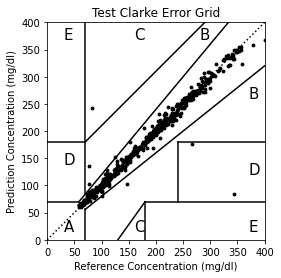

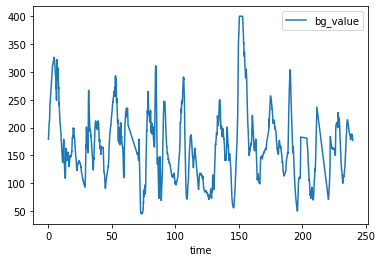

2021-06-18 15:44:26.581 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-18 15:44:26.582 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_test_0_6_1.pkl
2021-06-18 15:44:27.884 | INFO     | __main__:run_model:28 - {'model': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1974, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=F

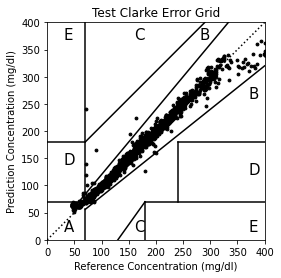

In [9]:
run_model(best3[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.7976,53.7860,7.3339,0.9906,0.0380,0.0280
1,5.2349,151.2235,12.2973,0.9749,0.0593,0.0321
2,5.6724,175.6895,13.2548,0.9698,0.0928,0.0404
3,4.6164,85.1547,9.2279,0.9848,0.0428,0.0271
4,4.5932,46.9290,6.8505,0.9889,0.0402,0.0287
5,4.3021,70.5117,8.3971,0.9883,0.0442,0.0256
6,4.4412,48.4579,6.9612,0.9895,0.0494,0.0299
7,4.2977,55.0649,7.4206,0.9901,0.0439,0.0268
8,4.8099,81.1924,9.0107,0.9837,0.0514,0.0301
9,4.4968,47.2921,6.8769,0.9911,0.0387,0.0261


2021-06-18 15:44:43.746 | INFO     | __main__:run_model:5 - Processing model: ExtraTreesRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5.8694,245.8069,15.6782,0.9605,0.1001,0.0401


2021-06-18 15:44:44.244 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_test_0_6_1.pkl
2021-06-18 15:44:44.279 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


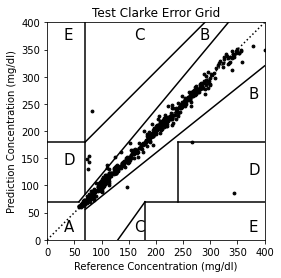

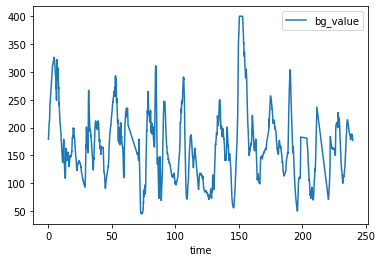

2021-06-18 15:44:44.874 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-18 15:44:44.876 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_test_0_6_1.pkl
2021-06-18 15:44:46.349 | INFO     | __main__:run_model:28 - {'model': ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1974, verbose=0, warm_start=False), 'model_name': 'ExtraTreesRegressor', 'internal_cga_analysis': [588, 8, 1, 2, 0], 'internal_rmse': 15.67822862964028, 'internal_rmadex': 12659.121655956138, 'unseen_cga_analysis'

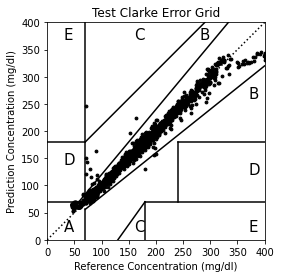

In [10]:
run_model(best3[1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.1480,55.8437,7.4729,0.9902,0.0418,0.0302
1,5.4505,219.7032,14.8224,0.9635,0.0691,0.0326
2,6.3666,184.9364,13.5991,0.9682,0.0945,0.0448
3,5.4182,95.1867,9.7564,0.9830,0.0484,0.0320
4,4.5309,44.0516,6.6371,0.9896,0.0370,0.0276
5,4.7820,69.8732,8.3590,0.9884,0.0434,0.0284
6,5.0951,55.1687,7.4276,0.9881,0.0530,0.0343
7,4.8196,58.9516,7.6780,0.9894,0.0443,0.0293
8,5.4858,90.9122,9.5348,0.9818,0.0488,0.0330
9,5.1756,54.1014,7.3554,0.9899,0.0429,0.0306


2021-06-18 15:44:51.747 | INFO     | __main__:run_model:5 - Processing model: LGBMRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6.1157,250.9366,15.8410,0.9597,0.0989,0.0398


2021-06-18 15:44:52.012 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_test_0_6_1.pkl
2021-06-18 15:44:52.043 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


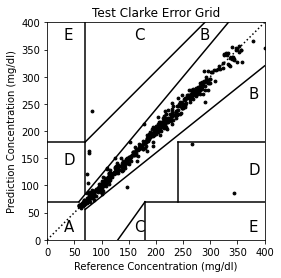

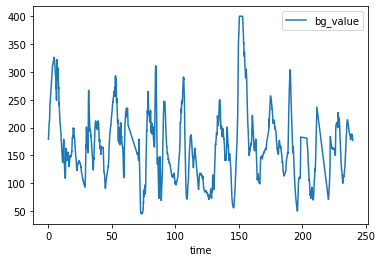

2021-06-18 15:44:52.439 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-18 15:44:52.441 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_test_0_6_1.pkl
2021-06-18 15:44:53.985 | INFO     | __main__:run_model:28 - {'model': LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1974, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), 'model_name': 'LGBMRegressor', 'internal_cga_analysis': [589, 7, 1, 2, 0], 'internal_rmse': 15.840979829707571, 'internal_rmadex': 13455.3428702395, 'unseen_cga_analysis': [2493, 12, 1, 2, 0], 'unseen_rmse'

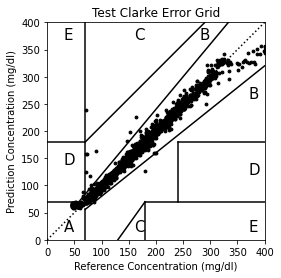

In [11]:
run_model(best3[2])

In [12]:
print(master_output)

{'GradientBoostingRegressor': {'model': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1974, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), 'model_name': 'GradientBoostingRegressor', 'internal_cga_analysis': [592, 4, 1, 2, 0], 'internal_rmse': 14.892402469319622, 'internal_rmadex': 14210.661024013261, 'unseen_cga_analysis': [2494, 9, 1, 4, 0], 'unseen_rmse': 10.630404931716809, 'unseen_rmadex': 95.08550714166824}, 'ExtraTreesRegr

In [13]:
pandas.DataFrame.from_dict(master_output, orient='index')

,model,model_name,internal_cga_analysis,internal_rmse,internal_rmadex,unseen_cga_analysis,unseen_rmse,unseen_rmadex
GradientBoostingRegressor,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",GradientBoostingRegressor,"[592, 4, 1, 2, 0]",14.892402,14210.661024,"[2494, 9, 1, 4, 0]",10.630405,95.085507
ExtraTreesRegressor,"(ExtraTreeRegressor(ccp_alpha=0.0, criterion='...",ExtraTreesRegressor,"[588, 8, 1, 2, 0]",15.678229,12659.121656,"[2488, 15, 1, 4, 0]",10.973817,107.048062
LGBMRegressor,"LGBMRegressor(boosting_type='gbdt', class_weig...",LGBMRegressor,"[589, 7, 1, 2, 0]",15.840980,13455.342870,"[2493, 12, 1, 2, 0]",10.451435,89.727841


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d560f233-0034-499f-bc4e-7ada8795cb9f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>